1. 자연어 처리란?

### 2. NLP Preprocessing <<<


3. Vectorization


4. Embedding


5. Modeling
****

# NLP Preprocessing란?

- **NLP 전처리는 정해진 답이 없으며 '데이터'와 '목적'에 따라** 달라집니다.
- 이 과정은 주로 **모델의 입력인 단어, 문장, 문서의 vector를 만들기 전에 진행**이 된다.

<일반적인 NLP 전처리의 과정>


1. 데이터를 불러온 후 각 신문기사들을 눈으로 확인하며 특수문자, 불용어 그리고 문장 구조에 대한 감을 잡습니다. <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" width="20">


2. 문제의 목적과 분석자의 재량에 따라 불용어를 설정하고 리스트에 저장합니다. 이번 대회에서는 **특수 문자**와 **조사**만 제거해도 어느 정도 높은 정확도를 얻을 수 있습니다. <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" width="20">


3. 불용어 이외의 특수 문자들을 제거합니다. 이번 대회를 위해 저는 정규표현식 패키지(re)를 사용하여 **한글과 영어 소문자를 제외한 모든 글자들을 제거**하였습니다. <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" width="20">


4. 형태소 분석을 통해 문장을 형태소 단위의 토큰으로 분리합니다. 이때 **내가 설정한 불용어들을 결과로 반환해주는 형태소 분석기를 사용하셔야** 합니다. 예를 들어 조사를 불용어로 설정하였는데 조사를 분리해주지 못하는 형태소 분석기는 후보에서 제외하시면 됩니다. <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB6c5FLCKLBrhqCWAUMuw8wx_YCyoVal5Sgw&usqp=CAU" width="20">


5. 형태소 단위의 토큰들을 기반으로 리스트에 저장된 불용어를 제거합니다.
****

## 1. 형태소 분석(Stemming)

- **형태소 분석** : 단어나 문장의 언어적 속성을 파악하는 것. 보통 품사의 태깅(PoS)을 통해 이루어지며 한국어 형태소 분석을 위해 Konlpy 패키지에 있는 다양한 함수를 이용하여 진행 할 수 있다.


- **형태소 분석을 하는 이유** : 주로 **형태소 단위로 의미있는 단어**를 가져가고 싶거나 품사 태깅을 통해 **형용사나 명사를 추출**하고 싶을 때 많이 이용한다.
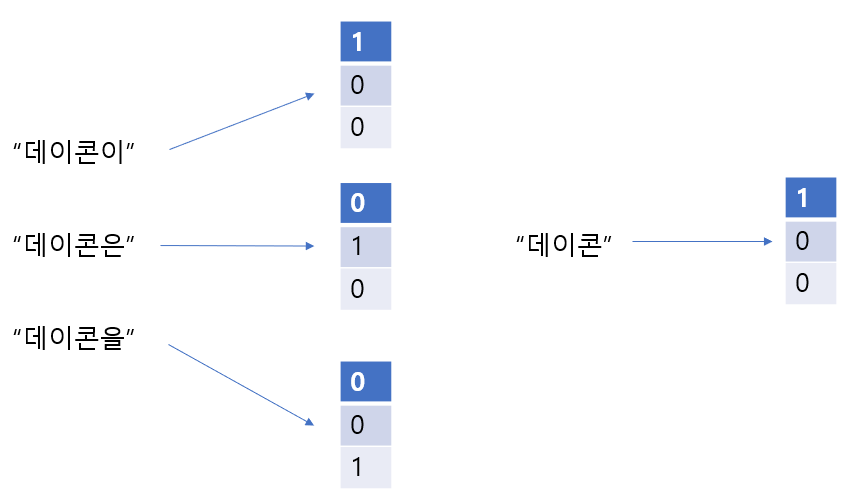


- 문장을 띄어쓰기 단위로만 분류하여 vectorization을 하게 되면 "데이콘"이라는 같은 의미의 토큰 세개('데이콘이', '데이콘은', '데이콘을')가 **서로 다른 vector를 갖게 됩니다.** 이렇게 되면 모델이 세 단어를 각각 다른 언어로 이해합니다. 하지만 **형태소 분석**을 통해 '데이콘'이라는 **토큰을 추출한다면 앞의 세 단어는 동일한 vector를 갖게되며 모델이 해당 토큰을 더 잘 학습하는 데 도움이 됩니다.**


- **형태소 분석은 어쩌면 모델링보다 성능에 더 중요한 영향을 미치는 아주 중요한 과정**입니다. 따라서 다양한 형태소 분석기를 사용하여 결과를 비교하는 것을 추천드립니다.

In [1]:
! pip install konlpy

In [2]:
import konlpy
konlpy.__version__

'0.5.2'

#### 1-1. Kkma()

In [3]:
# 11.542초
from konlpy.tag import Kkma
kkma = Kkma()

sentence = '데이콘에서 다양한 컴피티션을 즐기면서 실력있는 데이터 분석가로 성장하세요!!.'

print("형태소 단위로 문장 분리")
print("-----------------------")
print(kkma.morphs(sentence))
print(" ")
print("문장에서 명사 추출")
print("-----------------------")
print(kkma.nouns(sentence))
print(" ")
print("품사 태깅(PoS)")
print("-----------------------")
print(kkma.pos(sentence))

형태소 단위로 문장 분리
-----------------------
['데이', '콘', '에서', '다양', '하', 'ㄴ', '컴피티션', '을', '즐기', '면서', '실력', '있', '는', '데이터', '분석가', '로', '성장', '하', '세요', '!!', '.']
 
문장에서 명사 추출
-----------------------
['데이', '데이콘', '콘', '다양', '컴피티션', '실력', '데이터', '분석가', '성장']
 
품사 태깅(PoS)
-----------------------
[('데이', 'NNG'), ('콘', 'NNG'), ('에서', 'JKM'), ('다양', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('컴피티션', 'UN'), ('을', 'JKO'), ('즐기', 'VV'), ('면서', 'ECE'), ('실력', 'NNG'), ('있', 'VV'), ('는', 'ETD'), ('데이터', 'NNG'), ('분석가', 'NNG'), ('로', 'JKM'), ('성장', 'NNG'), ('하', 'XSV'), ('세요', 'EFN'), ('!!', 'SW'), ('.', 'SF')]


#### 1-2. Okt()

In [4]:
# 9.816초
from konlpy.tag import Okt
Okt = Okt()

sentence = '데이콘에서 다양한 컴피티션을 즐기면서 실력있는 데이터 분석가로 성장하세요!!.'

print("형태소 단위로 문장 분리")
print("-----------------------")
print(Okt.morphs(sentence))
print(" ")
print("문장에서 명사 추출")
print("-----------------------")
print(Okt.nouns(sentence))
print(" ")
print("품사 태깅(PoS)")
print("-----------------------")
print(Okt.pos(sentence))

형태소 단위로 문장 분리
-----------------------
['데', '이콘', '에서', '다양한', '컴피티션', '을', '즐기면서', '실력', '있는', '데이터', '분석', '가로', '성장하세요', '!!.']
 
문장에서 명사 추출
-----------------------
['데', '이콘', '컴피티션', '실력', '데이터', '분석', '가로']
 
품사 태깅(PoS)
-----------------------
[('데', 'Noun'), ('이콘', 'Noun'), ('에서', 'Josa'), ('다양한', 'Adjective'), ('컴피티션', 'Noun'), ('을', 'Josa'), ('즐기면서', 'Verb'), ('실력', 'Noun'), ('있는', 'Adjective'), ('데이터', 'Noun'), ('분석', 'Noun'), ('가로', 'Noun'), ('성장하세요', 'Adjective'), ('!!.', 'Punctuation')]


#### 1-3. Mecab()

In [5]:
# window에서 실행하려면 방법 찾아야 함.
from konlpy.tag import Mecab
Mecab = Mecab()

sentence = '데이콘에서 다양한 컴피티션을 즐기면서 실력있는 데이터 분석가로 성장하세요!!.'

print("형태소 단위로 문장 분리")
print("----------------------")
print(Mecab .morphs(sentence))
print(" ")
print("문장에서 명사 추출")
print("----------------------")
print(Mecab .nouns(sentence))
print(" ")
print("품사 태깅(PoS)")
print("----------------------")
print(Mecab .pos(sentence))

#### 1-4. Komoran()

In [6]:
from konlpy.tag import Komoran
Komoran = Komoran()

sentence = '데이콘에서 다양한 컴피티션을 즐기면서 실력있는 데이터 분석가로 성장하세요!!.'

print("형태소 단위로 문장 분리")
print("-----------------------")
print(Komoran.morphs(sentence))
print(" ")
print("문장에서 명사 추출")
print("-----------------------")
print(Komoran.nouns(sentence))
print(" ")
print("품사 태깅(PoS)")
print("-----------------------")
print(Komoran.pos(sentence))

형태소 단위로 문장 분리
-----------------------
['데', '이콘', '에서', '다양', '하', 'ㄴ', '컴', '피', '티', '션', '을', '즐기', '면서', '실력', '있', '는', '데이터', '분석가', '로', '성장', '하', '시', '어요', '!', '!', '.']
 
문장에서 명사 추출
-----------------------
['데', '이콘', '컴', '피', '티', '션', '실력', '데이터', '분석가', '성장']
 
품사 태깅(PoS)
-----------------------
[('데', 'NNB'), ('이콘', 'NNP'), ('에서', 'JKB'), ('다양', 'XR'), ('하', 'XSA'), ('ㄴ', 'ETM'), ('컴', 'NNG'), ('피', 'NNG'), ('티', 'NNG'), ('션', 'NNG'), ('을', 'JKO'), ('즐기', 'VV'), ('면서', 'EC'), ('실력', 'NNG'), ('있', 'VV'), ('는', 'ETM'), ('데이터', 'NNG'), ('분석가', 'NNG'), ('로', 'JKB'), ('성장', 'NNG'), ('하', 'XSV'), ('시', 'EP'), ('어요', 'EF'), ('!', 'SF'), ('!', 'SF'), ('.', 'SF')]


이 외에도 Twitter, Hannanum 등의 형태소 분석기(Pos Tagger)들이 존재합니다. 속도와 정확도 면에서 차이가 있으며 주로 Mecab 분석기를 이용합니다. 

**<형태소 분석기 성능 비교>**
- Mecab : 굉장히 속도가 빠르면서도 좋은 분석 결과를 보여준다.
- Komoran : 댓글롸 같이 정제되지 않은 글에 대해서 먼저 사용해보면 좋다.(오탈자를 어느정도 고려해준다.)
- Kkma : 분석 시간이 오래걸리기 때문에 잘 이용하지 않게 된다.
- Okt : 품사 태깅 결과를 Noun, Verb등 알아보기 쉽게 반환해준다.
- Khaiii: 카카오에서 가장 최근데 공개한 분석기, 성능이 좋다고 알려져 있으며 다양한 실험이 필요하다.
****

## 2. 표제어 추출(Lemmatization)

- Lemmatization과 Stemming은 큰 차이가 없습니다. 모두 단어의 본 모습을 찾아주는 과정으로서 Konlpy에서 공개한 형태소 분석기들을 이용하면 어느 정도 **어간 추출**이 가능합니다. 형태소 분석(Pos Tagging)을 stemming이라고 표기한 이유도 이와 같습니다.

In [8]:
from konlpy.tag import Kkma
kkma = Kkma()

sentence = '성장했었다.'
print("품사 태깅(PoS)")
print("----------------------")
print(kkma.pos(sentence))

품사 태깅(PoS)
----------------------
[('성장', 'NNG'), ('하', 'XSV'), ('었', 'EPT'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


In [9]:
sentence = '성장하였었다.'

print("품사 태깅(PoS)")
print("----------------------")
print(kkma.pos(sentence))

품사 태깅(PoS)
----------------------
[('성장', 'NNG'), ('하', 'XSV'), ('였', 'EPT'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


****

## 3. 불용어 제거(Stopwords removing)

- **불용어** : *문장에서 큰 의미가 없다고 생각되는 단어, 글자들*. 불용어는 데이터와 문제에 따라 유동적이다.  

    예시 : "이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!"
    

- 예시 문장에서 감성분석을 진행할 때는 **"훌륭한"**과 **"아름다운"**등이 주요 특징으로 사용될 것이다. 하지만 경우에 따라 이러한 형용사들을 제외한 **배우들의 연기력과 목소리**라는 정보에 집중해야 할 때가 있다. 이럴 때는 **"훌륭한"**과 **"아름다움"**은 **불용어로 정의**될 수 있다.

In [12]:
# 1. 영어 소문자와 한글을 제외한 모든 문자를 제거
# 2. Okt를 이용해 형태소 분석
# 3. 형태소 분석기를 거쳐 나온 결과들 중 stopwords 리스트에 포함되지 않는 토큰만 token이라는 리스트에 반환

from konlpy.tag import Okt
import re
tokenizer = Okt()

def text_preprocessing(text, tokenizer):
    
    stopwords = ['을', '를', '이', '가', '은', '는']
    
    text = re.sub('[^가-힣 a-z]', ' ', text)
    token = tokenizer.morphs(text)
    token = [t for t in token if t not in stopwords]
    
    return token

ex_text = "이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!"
example_pre = text_preprocessing(ex_text, tokenizer)

In [13]:
print(example_pre)

['이번', '에', '새롭게', '개봉', '한', '영화', '의', '배우', '들', '모두', '훌륭한', '연기력', '과', '아름다운', '목소리', '갖고', '있어']


## 4. 대회 적용

In [20]:
import pandas as pd

train = pd.read_csv('news_train.csv')

def text_preprocessing(text_list):
    stopwords = ['을', '를', '이', '가', '은', '는', 'null']  # 불용어 설정
    tokenizer = Okt()   # 형태소 분석기
    token_list = []
    
    for text in text_list:
        txt = re.sub('[^가-힣 a-z]', ' ', text)  # 한글과 영어 소문자만 남기고 다른 글자 모두 제거
        token = tokenizer.morphs(txt)            # 형태소 분석
        token = [t for t in token if t not in stopwords or type(t) != float]  # 형태소 분석 결과 중 stopwords에 해당하지 않는 것만 추출
        token_list.append(token)
        
    return token_list, tokenizer

# 형태소 분석기를 따로 저장한 이유는 후에 test 데이터 전처리를 진행할 때 이용해야 되기 때문
train['new_article'], okt = text_preprocessing(train['content'])

In [22]:
train.head()

,n_id,date,title,content,ord,info,new_article
0,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도,1,0,"[이데일리, 현재, 코스닥, 기관, 억, 순, 매도]"
1,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",2,1,"[실적, 기반, 저가, 에, 매집, 해야, 할, 월, 급등, 유망, 주, 전격, 공개]"
2,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",3,1,"[하, 이스, 탁론, 선취, 수수료, 없는, 월, 최저, 금리, 상품, 출시]"
3,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지,4,0,"[종합, 경제, 정보, 미디어, 이데일리, 무단, 전, 재, 재, 배포, 금지]"
4,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",전국적인 소비 붐 조성에 기여할 예정,1,0,"[전국, 적, 인, 소비, 붐, 조성, 에, 기여, 할, 예정]"


In [21]:
train.to_csv('news_train_preprocessing_kani_1226.csv')

이제 분리한 토큰을 기반으로 모델의 입력인 vectorization을 진행할 차례군요!!

## To be continued......